# Overview

Topics:

- Data types
- Imports
- Basic file I/O
- The Pythonic approach to iteration
- More on user-defined functions
- Comparisons and logic
- Standard Python syle

## Data Types

### Boolean values

In [1]:
x = True
y = 100 < 10
y

False

In [2]:
type(y)

bool

In [3]:
x + y

1

In [4]:
x*y

0

In [5]:
True + True

2

In [6]:
bools = [True, True, False, True]  #List of Boolean values

sum(bools)

3

These are called Boolean arithmetic

### Integers and Floats

In [7]:
a, b = 1, 2

In [8]:
c, d = 2.5, 10.0

In [9]:
type(c)

float

In [10]:
type(a)

int

Computers distinguish between the two because, while floats are more informative, arithmetic operations on integers are faster and more accurate

As long as you’re using Python 3.x, division of integers yields floats

In [11]:
1/2

0.5

But be careful! If you’re still using Python 2.x, division of two integers returns only the integer part

For integer division in Python 3.x use this syntax:

In [12]:
1 // 2

0

**Caution!**  
Comparison between float numbers might produce *unexpected* and *non-intutitve* result!

In [8]:
import numpy as np

a = np.sqrt(2)
b = a/10
c = b*10
print(c)
print(a)
a == c

1.41421356237
1.41421356237


False

Even trivial addition may also have the same problem.

In [10]:
import numpy as np

a = np.sqrt(2)
b = a + 1
c = b - 1
print(c)
print(a)
a == c

1.41421356237
1.41421356237


False

Complex numbers are another primitive data type in Python

In [13]:
x = complex(1, 2)
y = complex(2, 1)
x * y

5j

In [14]:
x

(1+2j)

In [15]:
x = complex(3, 4)

In [16]:
x

(3+4j)

### Containers

Python has several basic types for storing collections of (possibly heterogeneous) data

We’ve already discussed lists

A related data type is tuples, which are “immutable” lists

In [25]:
x = (1, 'a')
x = [1, 'a']

In [17]:
x = ('a', 'b')  # Round brackets instead of the square brackets
x = 'a', 'b'   # Or no brackets at all---the meaning is identical
x

('a', 'b')

In [18]:
type(x)

tuple

In Python, an object is called immutable if, once created, the object cannot be changed

Conversely, an object is mutable if it can still be altered after creation

Python lists are mutable

In [20]:
x = [1, 2]
x[0] = 10   # Now x = [10, 2]

In [21]:
x

[10, 2]

But tuples are not

In [22]:
x = (1, 2)
x[0] = 10

TypeError: 'tuple' object does not support item assignment

We’ll say more about the role of mutable and immutable data a bit later

Tuples (and lists) can be “unpacked” as follows

In [26]:
integers = (10, 20, 30)
x, y, z = integers
x

10

In [27]:
y

20

Tuple unpacking is convenient and we’ll use it often

### Slice Notation

In [32]:
a = [2, 4, 6, 8]
a[1:]

[4, 6, 8]

In [33]:
a[1:3]

[4, 6]

The general rule is that a[m:n] returns n - m elements, starting at a[m]

Negative numbers are also permissible

In [34]:
a[-2:]  # Last two elements of the list

[6, 8]

The same slice notation works on tuples and strings

In [35]:
s = 'foobar'
s[-3:]  # Select the last three elements

'bar'

### Sets and Dictionaries

Dictionaries are much like lists, except that the items are named instead of numbered

In [12]:
d = {'name': 'Frodo', 'age': 33}
type(d)

dict

In [13]:
d['age']

33

The names 'name' and 'age' are called the keys

The objects that the keys are mapped to ('Frodo' and 33) are called the values

This will add a new element into the set.

In [14]:
d['sex'] = 'male'
d

{'age': 33, 'name': 'Frodo', 'sex': 'male'}

We can change value of any element by

In [15]:
d['sex'] = 'female'
d

{'age': 33, 'name': 'Frodo', 'sex': 'female'}

   
**Sets** are unordered collections without duplicates, and set methods provide the usual set theoretic operations

In [17]:
s1 = {'a', 'b'}
type(s1)

set

In [18]:
s2 = {'b', 'c'}
s1.issubset(s2)

False

In [19]:
s1.intersection(s2)

{'b'}

You may want to add a new element into a set by

In [20]:
s1.add(7)
s1

{'a', 'b', 7}

Then you found that you mistakenly put an integer into a set of characters, and you can correct your mistake by

In [23]:
s1.discard(7)
s1

{'a', 'b'}

The set() function creates sets from sequences

In [41]:
s3 = set(('foo', 'bar', 'foo'))
s3

{'bar', 'foo'}

## Imports

From the start, Python has been designed around the twin principles of

- a small core language
- extra functionality in separate libraries or modules

For example, if you want to compute the square root of an arbitrary number, there’s no built in function that will perform this for you

Instead, you need to import the functionality from a module — in this case a natural choice is math

In [42]:
import math

In [43]:
math.sqrt(4)

2.0

Note that the math module is part of the standard library, which is part of every Python distribution

On the other hand, the scientific libraries we’ll work with later are not part of the standard library

To end this discussion with a final comment about modules and imports, in your Python travels you will often see the following syntax

In [ ]:
from math import *

sqrt(4)

Here from math import * pulls all of the functionality of math into the current “namespace” — a concept we’ll define formally later on

Actually this kind of syntax should be avoided for the most part

In essence the reason is that it pulls in lots of variable names without explicitly listing them — a potential source of conflicts

## Input and Output

Let’s have a quick look at basic file input and output

We discuss only reading and writing to text files

Let’s start with writing

In [44]:
f = open('newfile.txt', 'w')   # Open 'newfile.txt' for writing
f.write('Testing\n')           # Here '\n' means new line
f.write('Testing again')
f.close()

Here

- The built-in function open() creates a file object for writing to
- Both write() and close() are methods of file objects

Where is this file that we’ve created?

Recall that Python maintains a concept of the present working directory (pwd) that can be located from with Jupyter or IPython via

In [45]:
%pwd

'C:\\Users\\Administrator'

If a path is not specified, then this is where Python writes to

We can also use Python to read the contents of newline.txt as follows

In [46]:
f = open('newfile.txt', 'r')
out = f.read()
out

'Testing\nTesting again'

In [47]:
print(out)

Testing
Testing again


Note that if newfile.txt is not in the present working directory then this call to open() fails

In this case you can shift the file to the pwd or specify the full path to the file

In [ ]:
f = open('insert_full_path_to_file/newfile.txt', 'r')

## Iterating

One of the most important tasks in computing is stepping through a sequence of data and performing a given action

One of Python’s strengths is its simple, flexible interface to this kind of iteration via the for loop

### Looping over Different Objects

Many Python objects are “iterable”, in the sense that they can be looped over

To give an example, let’s write the file us_cities.txt, which lists US cities and their population, to the present working directory

%%file us_cities.txt
new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229

Suppose that we want to make the information more readable, by capitalizing names and adding commas to mark thousands

The program us_cities.py program reads the data in and makes the conversion:

data_file = open('us_cities.txt', 'r')
for line in data_file:
    city, population = line.split(':')            # Tuple unpacking
    city = city.title()                           # Capitalize city names
    population = '{0:,}'.format(int(population))  # Add commas to numbers
    print(city.ljust(15) + population)
data_file.close()

Here format() is a string method used for inserting variables into strings

The output is as follows

New York       8,244,910
Los Angeles    3,819,702
Chicago        2,707,120
Houston        2,145,146
Philadelphia   1,536,471
Phoenix        1,469,471
San Antonio    1,359,758
San Diego      1,326,179
Dallas         1,223,229

The reformatting of each line is the result of three different string methods, the details of which can be left till later

The interesting part of this program for us is line 2, which shows that

1. The file object f is iterable, in the sense that it can be placed to the right of in within a for loop
2. Iteration steps through each line in the file

This leads to the clean, convenient syntax shown in our program

Many other kinds of objects are iterable, and we’ll discuss some of them later on

### Looping without Indices

One thing you might have noticed is that Python tends to favor looping without explicit indexing

For example,

In [50]:
x_values = [1,2,3] #Some iterable x
for x in x_values:
    print(x * x)

1
4
9


is preferred to

In [51]:
for i in range(len(x_values)):
    print(x_values[i] * x_values[i])

1
4
9


When you compare these two alternatives, you can see why the first one is preferred

Python provides some facilities to simplify looping without indices

One is zip(), which is used for stepping through pairs from two sequences

For example, try running the following code

In [52]:
countries = ('Japan', 'Korea', 'China')
cities = ('Tokyo', 'Seoul', 'Beijing')
for country, city in zip(countries, cities):
    print('The capital of {0} is {1}'.format(country, city))

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


The zip() function is also useful for creating dictionaries — for example

In [53]:
names = ['Tom', 'John']
marks = ['E', 'F']
dict(zip(names, marks))

{'John': 'F', 'Tom': 'E'}

If we actually need the index from a list, one option is to use enumerate()

To understand what enumerate() does, consider the following example

In [55]:
letter_list = ['a', 'b', 'c']
for index, letter in enumerate(letter_list):
    print("letter_list[{0}] = '{1}'".format(index, letter))

letter_list[0] = 'a'
letter_list[1] = 'b'
letter_list[2] = 'c'


## Comparisons and Logical Operators

Many different kinds of expressions evaluate to one of the Boolean values (i.e., True or False)

A common type is comparisons, such as

In [60]:
x, y = 1, 2
x < y

True

In [61]:
x > y

False

One of the nice features of Python is that we can chain inequalities

In [62]:
1 < 2 < 3

True

In [63]:
1 <= 2 <= 3

True

In [64]:
x = 1    # Assignment
x == 2   # Comparison

False

For “not equal” use !=

In [65]:
1 != 2

True

Note that when testing conditions, we can use any valid Python expression

In [66]:
x = 'yes' if 42 else 'no'
x

'yes'

In [67]:
x = 'yes' if [] else 'no'
x

'no'

What’s going on here?

The rule is:

- Expressions that evaluate to zero, empty sequences or containers (strings, lists, etc.) and None are all equivalent to False

for example, [] and () are equivalent to False in an if clause

- All other values are equivalent to True

for example, 42 is equivalent to True in an if clause

We can combine expressions using and, or and not

These are the standard logical connectives (conjunction, disjunction and denial)

In [68]:
1 < 2 and 'f' in 'foo'

True

In [69]:
1 < 2 and 'g' in 'foo'

False

In [70]:
1 < 2 or 'g' in 'foo'

True

In [71]:
not True

False

In [72]:
not not True

True

Remember

- P and Q is True if both are True, else False
- P or Q is False if both are False, else True

## More Functions

Python has a number of built-in functions that are available without import

We have already met some

In [73]:
max(19, 20)

20

In [74]:
range(4) # in python3 this returns a range iterator object

range(0, 4)

In [75]:
list(range(4))  # will evaluate the range iterator and create a list

[0, 1, 2, 3]

In [76]:
str(22)

'22'

In [77]:
type(22)

int

Two more useful built-in functions are any() and all()

In [78]:
bools = False, True, True
all(bools)  # True if all are True and False otherwise

False

In [80]:
any(bools)  # False if all are False and True otherwise

True

Now let’s talk some more about user-defined functions constructed using the keyword def

### Why Write Functions?

User defined functions are important for improving the clarity of your code by

- separating different strands of logic
- facilitating code reuse

(Writing the same thing twice is almost always a bad idea)

### The Flexibility of Python Functions

As we discussed in the previous lecture, Python functions are very flexible

In particular

- Any number of functions can be defined in a given file
- Functions can be (and often are) defined inside other functions
- Any object can be passed to a function as an argument, including other functions
- A function can return any kind of object, including functions

We already gave an example of how straightforward it is to pass a function to a function

Note that a function can have arbitrarily many return statements (including zero)

Execution of the function terminates when the first return is hit, allowing code like the following example

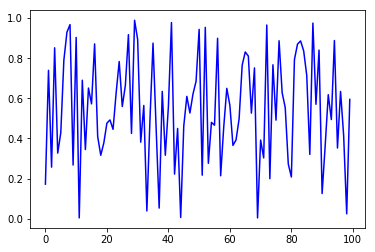

In [81]:
import numpy as np
import matplotlib.pyplot as plt


def generate_data(n, generator_type):
    epsilon_values = []
    for i in range(n):
        e = generator_type()
        epsilon_values.append(e)
    return epsilon_values

data = generate_data(100, np.random.uniform)
plt.plot(data, 'b-')
plt.show()

In [ ]:
def f(x):
    if x < 0:
        return 'negative'
    return 'nonnegative'

Functions without a return statement automatically return the special Python object None

### Docstrings

Python has a system for adding comments to functions, modules, etc. called docstrings

The nice thing about docstrings is that they are available at run-time

For example, let’s say that this code resides in file temp.py

In [82]:
# Filename: temp.py
def f(x):
    """
    This function squares its argument
    """
    return x**2

After running this code, the docstring is available as follows

In [83]:
f?

Type:       function
String Form:<function f at 0x2223320>
File:       /home/john/temp/temp.py
Definition: f(x)
Docstring:  This function squares its argument

In [84]:
f??

Type:       function
String Form:<function f at 0x2223320>
File:       /home/john/temp/temp.py
Definition: f(x)
Source:
def f(x):
    """
    This function squares its argument
    """
    return x**2

With one question mark we bring up the docstring, and with two we get the source code as well

### One-Line Functions: lambda

The lambda keyword is used to create simple functions on one line

For example, the definitions

In [85]:
def f(x):
    return x**3

and

In [86]:
f = lambda x: x**3

are entirely equivalent

Here the function created by lambda is said to be anonymous, because it was never given a name

lambda function can be useful when we need a function as an input of another function

In [ ]:
from scipy.integrate import quad

quad(lambda x: x**3, 0, 2)

### Keyword Arguments

In [25]:
def f(x, coefficients=(1, 1)):
    a, b = coefficients
    return a + b * x

Here coefficients is a keyword argument, while x is a positional argument

In [26]:
f(2, coefficients=(0, 0))

0

In [27]:
f(2)  # Use default values (1, 1)

3

## Coding Style and PEP8

You can see the prefered coding style of Python by typing *import this* in the prompt

Among other things, Python strongly favors consistency in programming style

## Exercises

### Exercise 1

Part 1: Given two numeric lists or tuples x_vals and y_vals of equal length, compute their inner product using zip()

Part 2: In one line, count the number of even numbers in 0,...,99

Hint: x % 2 returns 0 if x is even, 1 otherwise
Part 3: Given pairs = ((2, 5), (4, 2), (9, 8), (12, 10)), count the number of pairs (a, b) such that both a and b are even

### Exercise 2

Consider the polynomial

\begin{equation}      p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n = \sum_{i=0}^n a_i x^i             \end{equation}

Write a function p such that p(x, coeff) that computes the value in (1) given a point x and a list of coefficients coeff

Try to use enumerate() in your loop

### Exercise 3

Write a function that takes a string as an argument and returns the number of capital letters in the string

Hint: 'foo'.upper() returns 'FOO'

### Exercise 4

Write a function that takes two sequences seq_a and seq_b as arguments and returns True if every element in seq_a is also an element of seq_b, else False

- By “sequence” we mean a list, a tuple or a string
- Do the exercise without using sets and set methods

### Exercise 5

When we cover the numerical libraries, we will see they include many alternatives for interpolation and function approximation

Nevertheless, let’s write our own function approximation routine as an exercise

In particular, without using any imports, write a function linapprox that takes as arguments

- A function f mapping some interval [a,b] into R
- two scalars a and b providing the limits of this interval
- An integer n determining the number of grid points
- A number x satisfying a <= x <= b

and returns the piecewise linear interpolation of f at x, based on n evenly spaced grid points a = point[0] < point[1] < ... < point[n-1] = b

Aim for clarity, not efficiency

### Exercise 6

1.	Using enumerate to find out the indices of all the even integers in list l1=[1,3,5,2,1,6,8,0,3] 
2.  Using zip() function to perform the task above

### Exercise 7

Get the location indices of the elements which are equal to 0, not equal to 0, larger than the mean, or smaller than the mean in  list l2=[1,3,5,2,7,10,0,2,3,0,1]

### Exercise 8

c1 and c2 are two booleans

Use *and, or, not* to construct an *exclusive or* which is true when the true value of its components are different

### Exercise 9

Let s1=pd.Series(l1), and s2=pd.Series(l2)

Use all(), any() to perform the following:

1. check s1 if it is all non-zero
2. check s2 if any of its member is larger than 2